inspired by [Creating beautiful maps with Python](https://towardsdatascience.com/creating-beautiful-maps-with-python-6e1aae54c55c) from Carlos Cilleruelo

In [1]:
import osmnx as ox
import networkx as nx
import sys

In [2]:
def map_from_string(place):

    G0 = ox.graph_from_place(place, network_type='all',
                             simplify=True, retain_all=True)

    G1 = ox.graph_from_place(place, network_type='all',
                             simplify=True, retain_all=True, truncate_by_edge=False,
                             clean_periphery=False, custom_filter='["natural"~"water"]')

    G2 = ox.graph_from_place(place, network_type='all',
                             simplify=True, retain_all=True, truncate_by_edge=False,
                             clean_periphery=False, custom_filter='["waterway"~"river"]')

    #center_point = (48.852968, 2.349902)
    #dist=10000

    #G0 = ox.graph_from_point(center_point, dist=dist, dist_type='bbox', network_type='all',
    #              simplify=True, retain_all=True)

    #G1 = ox.graph_from_point(center_point, dist=dist, dist_type='bbox', network_type='all',
    #                         simplify=True, retain_all=True, truncate_by_edge=False,
    #                         clean_periphery=False, custom_filter='["natural"~"water"]')

    #G2 = ox.graph_from_point(center_point, dist=dist, dist_type='bbox', network_type='all',
    #                         simplify=True, retain_all=True, truncate_by_edge=False,
    #                         clean_periphery=False, custom_filter='["waterway"~"river"]')

    # Lists to store colors and widths
    roadColors = []
    roadWidths = []

    data = []
    for _, _, _, ddata in G0.edges(keys=True, data=True):
        data.append(ddata)

    for item in data:
        if "length" in item.keys():
            if item["length"] <= 100:
                linewidth = 0.10
                color = "#a6a6a6"
            elif item["length"] > 100 and item["length"] <= 200:
                linewidth = 0.15
                color = "#676767"
            elif item["length"] > 200 and item["length"] <= 400:
                linewidth = 0.25
                color = "#454545"
            elif item["length"] > 400 and item["length"] <= 800:
                color = "#bdbdbd"
                linewidth = 0.35
            else:
                color = "#d5d5d5"
                linewidth = 0.45
            if "primary" in item["highway"]:
                linewidth = 0.5
                color = "#ffff"
        else:
            color = "#a6a6a6"
            linewidth = 0.10

        roadColors.append(color)
        roadWidths.append(linewidth)

    # if "" in item["highway"]

    Gwater = nx.compose(G1, G2)

    data = []
    for _, _, _, ddata in Gwater.edges(keys=True, data=True):
        data.append(ddata)

    for item in data:
        if "name" in item.keys():
            if item["length"] > 400:
                color = "#72b1b1"
                linewidth = 1.5
            else:
                color = "#72b1b1"
                linewidth = 0.5
        else:
            color = "#72b1b1"
            linewidth = 0.5

        roadColors.append(color)
        roadWidths.append(linewidth)

    # if "" in item["waterway"]

    G = nx.compose(G0, Gwater)

    fig, ax = ox.plot_graph(G, node_size=0, figsize=(27, 40),
                        dpi = 300, save = False, edge_color=roadColors,
                        edge_linewidth=roadWidths, edge_alpha=1)
    fig.tight_layout(pad=0)
    fig.savefig("%s.png"%place.replace(', ','_'), dpi=300, format="png", bbox_inches='tight',
                facecolor=fig.get_facecolor(), transparent=False)

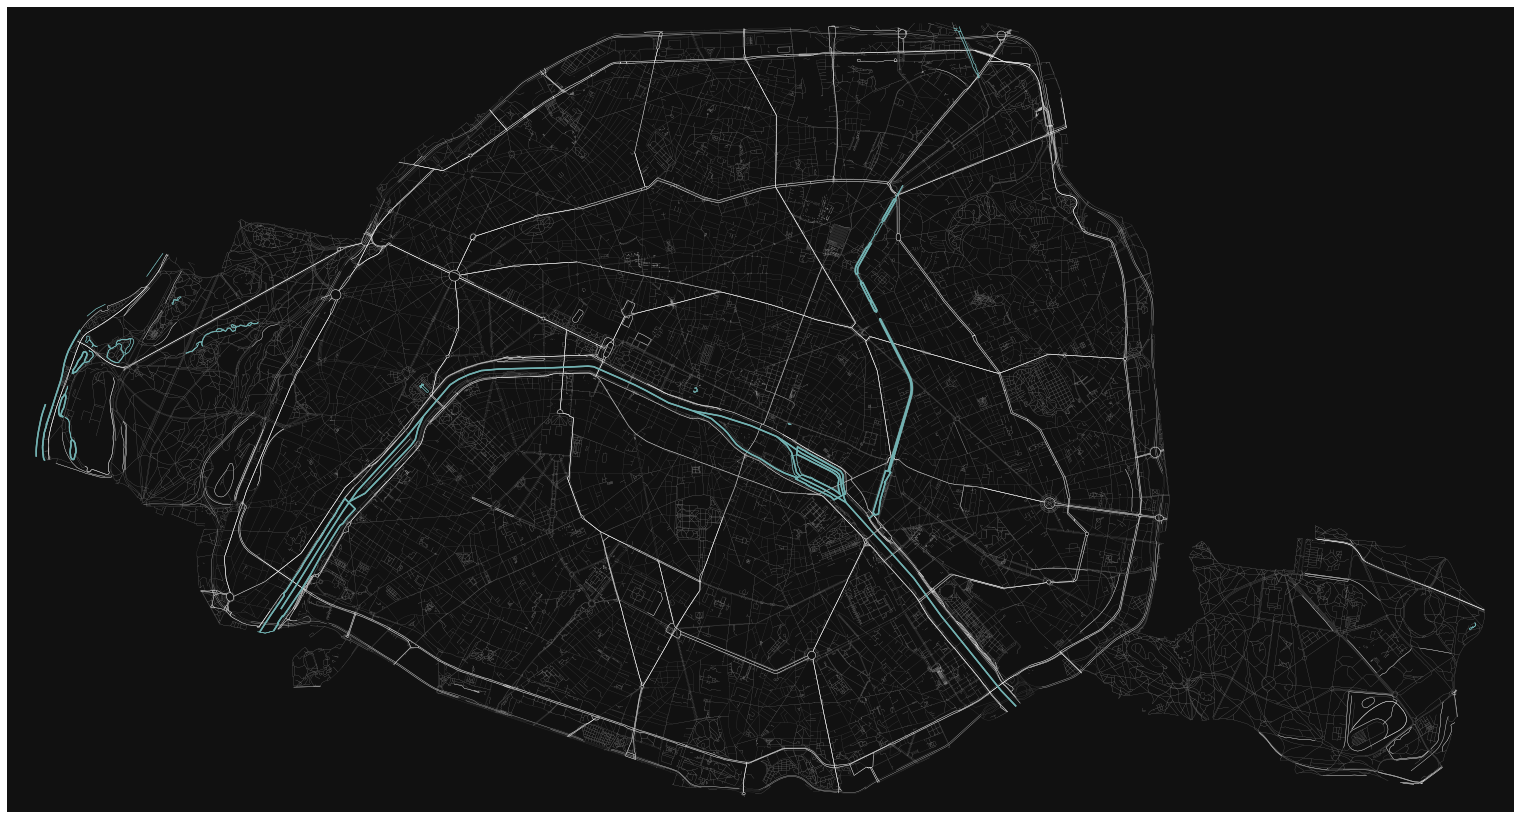

In [4]:
map_from_string('Paris, France')